# **Loading Dataset Data Cleaning And Preprocessing**

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [14]:
# STEP 2: Load the dataset
# Replace with the correct file path if needed.
# If file is uploaded to Colab, use the uploaded filename.
df = pd.read_csv("liver_cancer_dataset (1).csv")

# Display first few rows
df.head()


,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,Female,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,Female,19.9,Occasional,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,Female,25.5,Never,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,Male,16.0,Never,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,Male,21.0,Occasional,Former,0,0,39.5,4.95,1,0,Low,1,1


In [15]:
# STEP 3: Basic Info about Dataset
print("Shape of dataset:", df.shape)
print("\nColumns and Data Types:")
print(df.dtypes)

print("\nCheck for Missing Values:")
print(df.isnull().sum())


Shape of dataset: (5000, 14)

Columns and Data Types:
age                          int64
gender                      object
bmi                        float64
alcohol_consumption         object
smoking_status              object
hepatitis_b                  int64
hepatitis_c                  int64
liver_function_score       float64
alpha_fetoprotein_level    float64
cirrhosis_history            int64
family_history_cancer        int64
physical_activity_level     object
diabetes                     int64
liver_cancer                 int64
dtype: object

Check for Missing Values:
age                        0
gender                     0
bmi                        0
alcohol_consumption        0
smoking_status             0
hepatitis_b                0
hepatitis_c                0
liver_function_score       0
alpha_fetoprotein_level    0
cirrhosis_history          0
family_history_cancer      0
physical_activity_level    0
diabetes                   0
liver_cancer               0
dtype: in

In [16]:
# STEP 4: Handle Missing Values
# Strategy: Fill numerical with mean, categorical with mode
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
age                        0
gender                     0
bmi                        0
alcohol_consumption        0
smoking_status             0
hepatitis_b                0
hepatitis_c                0
liver_function_score       0
alpha_fetoprotein_level    0
cirrhosis_history          0
family_history_cancer      0
physical_activity_level    0
diabetes                   0
liver_cancer               0
dtype: int64


In [17]:
# STEP 5: Encode Categorical Columns
label_enc = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = label_enc.fit_transform(df[col])

print("Data after encoding categorical features:")
df.head()


Data after encoding categorical features:


,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,0,18.1,2,1,0,0,51.9,16.44,0,0,1,0,0
1,81,0,19.9,1,2,0,0,41.6,8.09,0,0,2,1,0
2,58,0,25.5,0,2,0,0,76.0,0.64,0,0,2,0,0
3,44,1,16.0,0,1,0,0,50.3,19.09,0,0,1,1,0
4,72,1,21.0,1,1,0,0,39.5,4.95,1,0,1,1,1


In [18]:
# STEP 6: Standardize Numerical Columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include=["int64","float64"]).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Data after scaling numerical features:")
df.head()


Data after scaling numerical features:


,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,0.682203,-0.997603,-1.528916,1.592312,-0.353893,-0.422059,-0.3255,-0.894441,0.087565,-0.657149,-0.564108,-0.268359,-0.498750,-0.527679
1,1.505110,-0.997603,-1.176299,0.264279,0.926473,-0.422059,-0.3255,-1.586925,-0.461947,-0.657149,-0.564108,1.058836,2.005014,-0.527679
2,0.049197,-0.997603,-0.079268,-1.063754,0.926473,-0.422059,-0.3255,0.725838,-0.952231,-0.657149,-0.564108,1.058836,-0.498750,-0.527679
3,-0.837011,1.002403,-1.940302,-1.063754,-0.353893,-0.422059,-0.3255,-1.002011,0.261961,-0.657149,-0.564108,-0.268359,2.005014,-0.527679
4,0.935405,1.002403,-0.960811,0.264279,-0.353893,-0.422059,-0.3255,-1.728111,-0.668590,1.521726,-0.564108,-0.268359,2.005014,1.895091


# **Data Visualization**

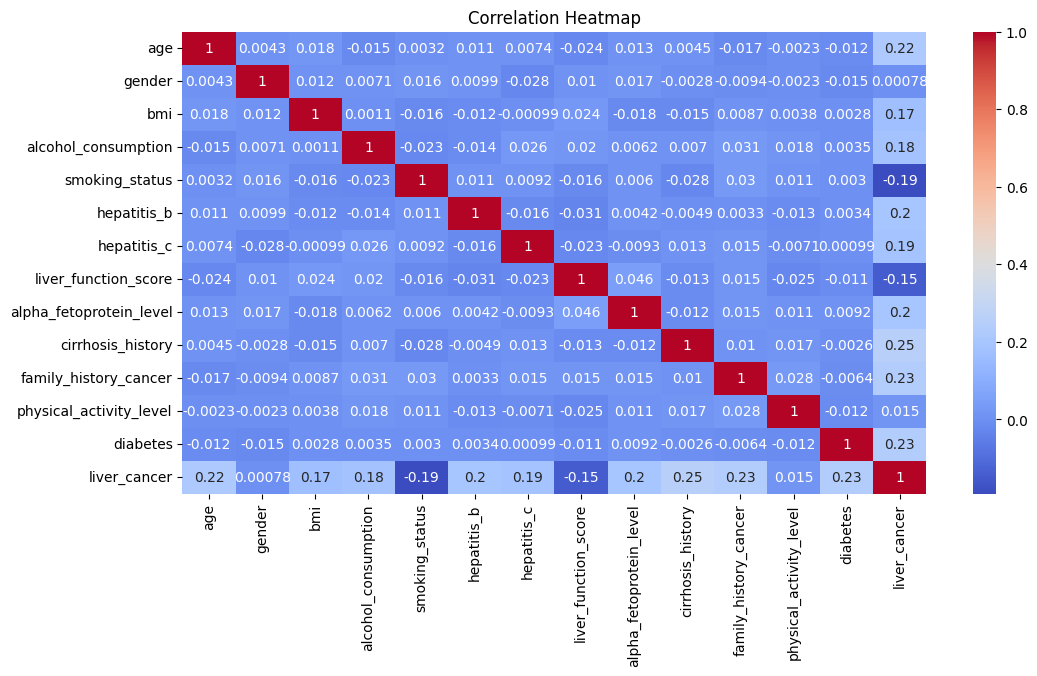

In [20]:
# STEP 7: Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



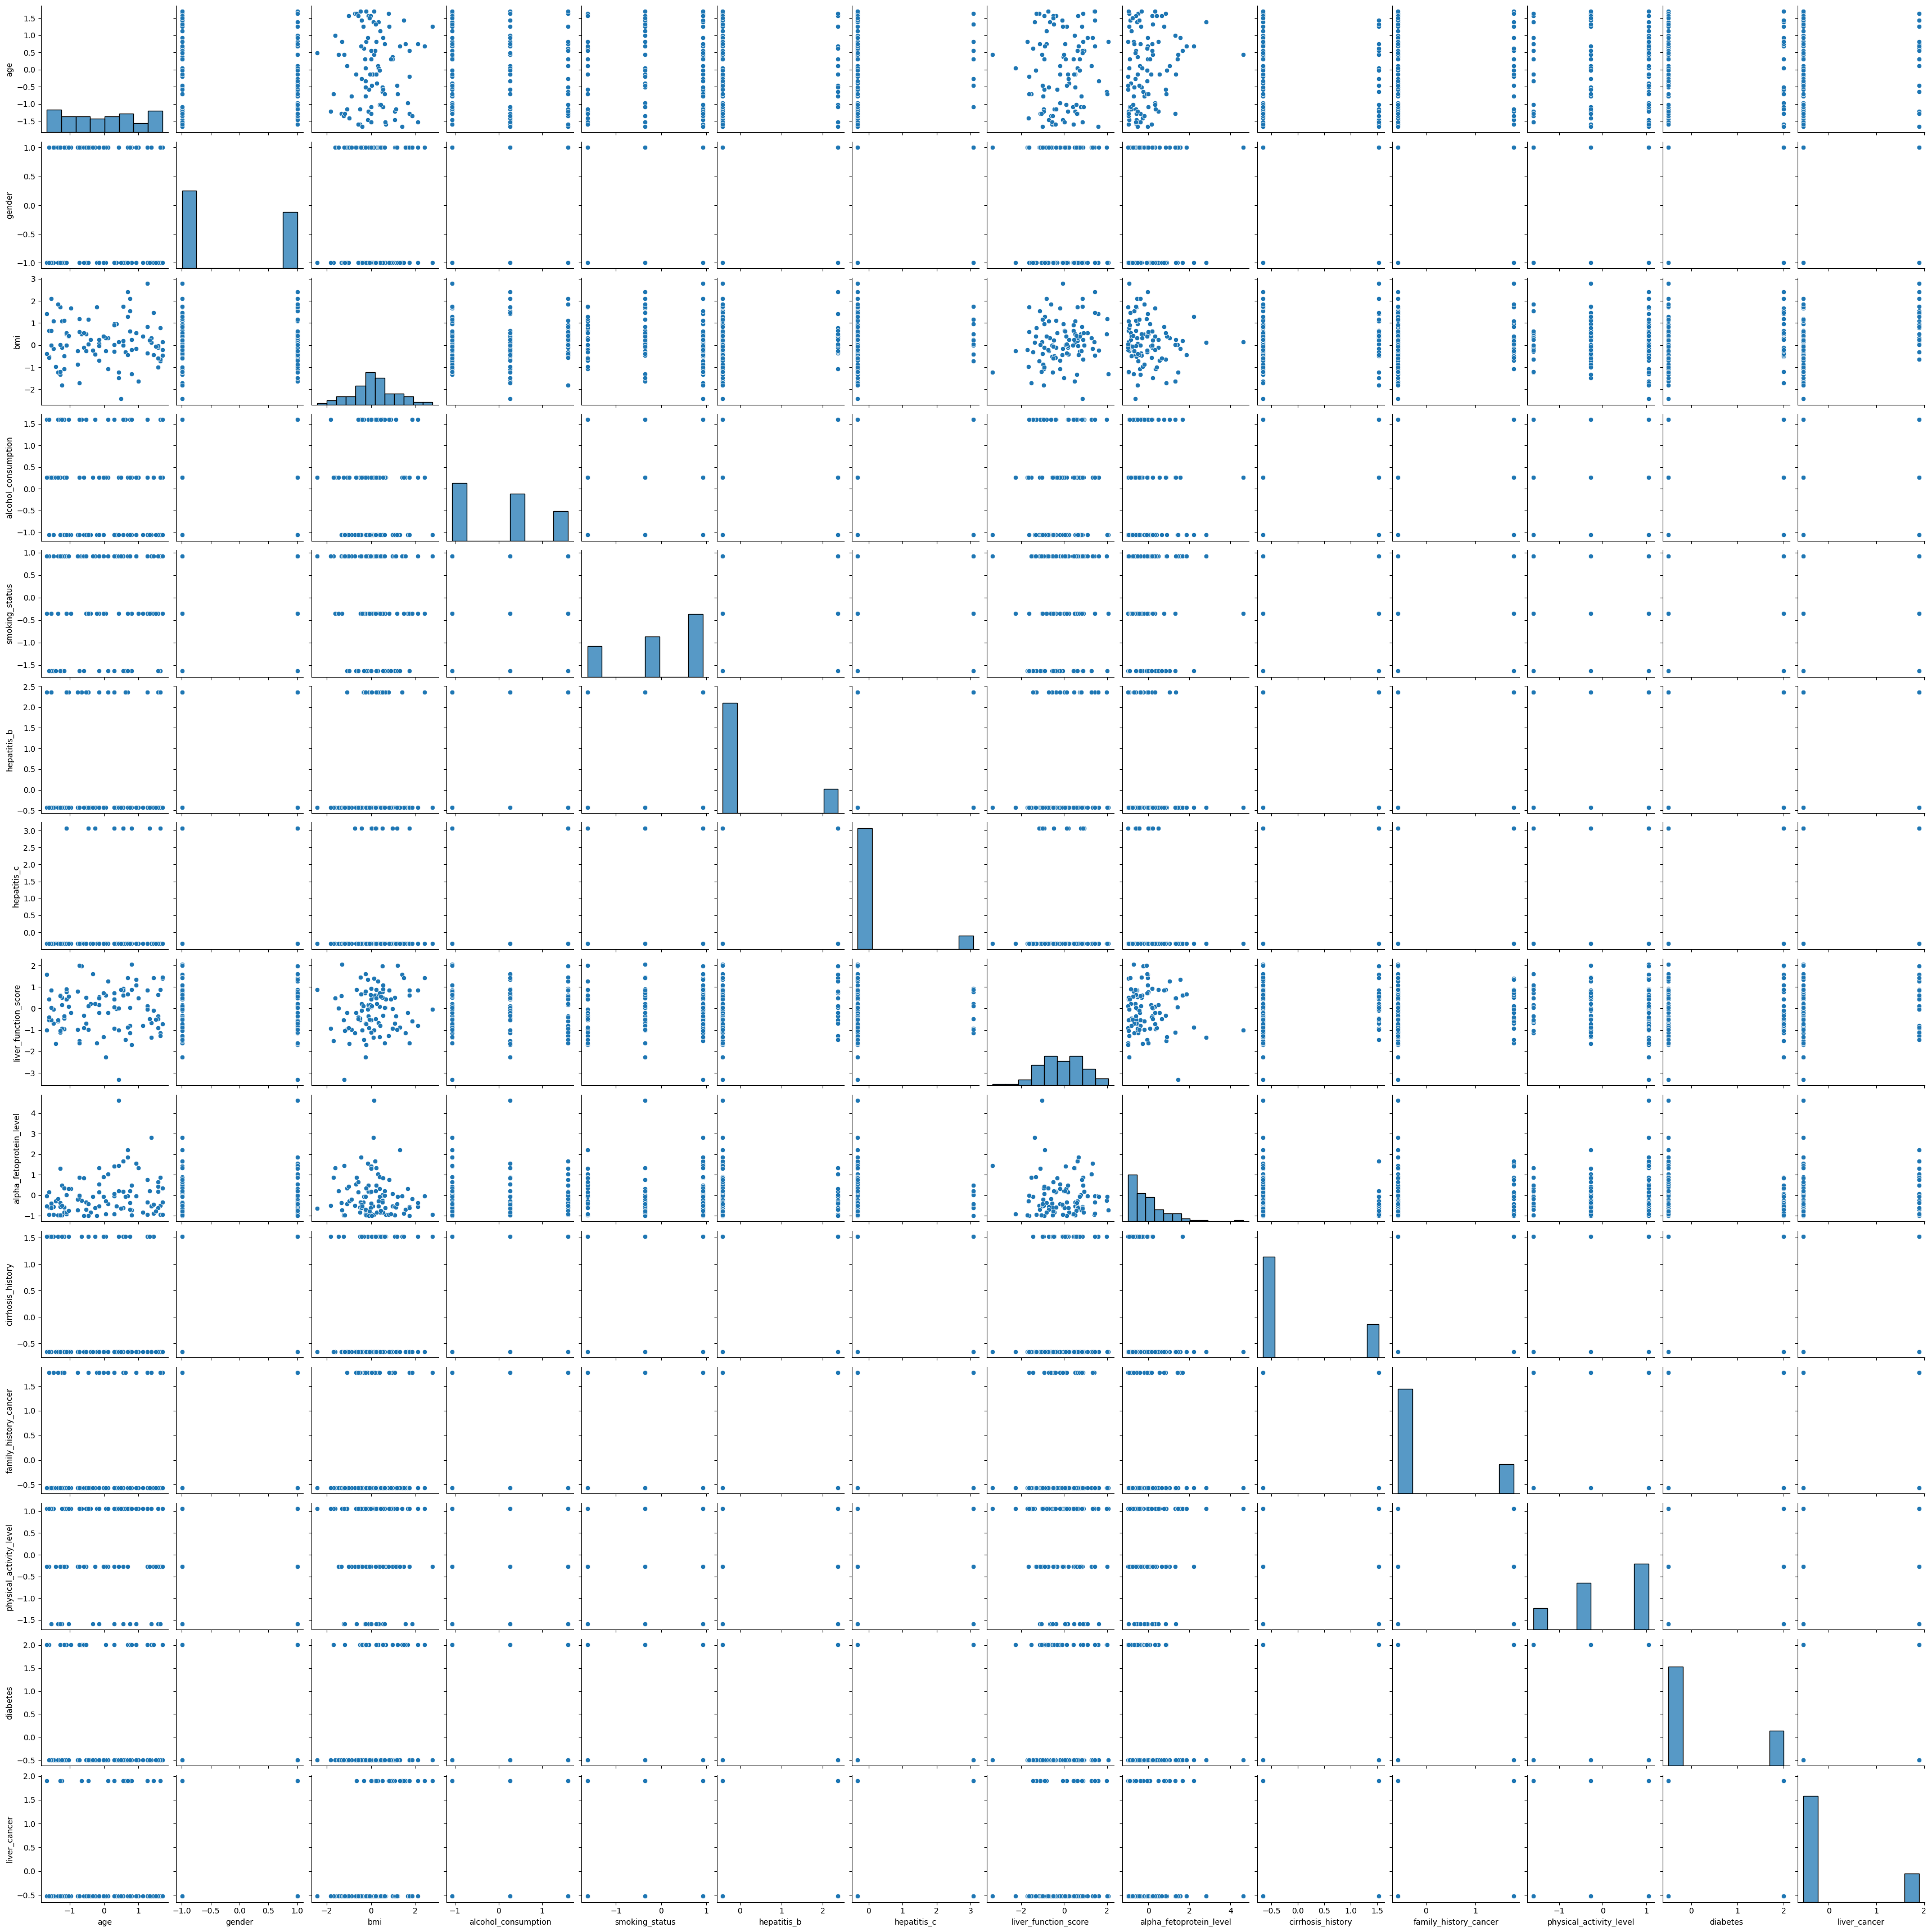

In [21]:
# STEP 8: Pairplot (Relationships between features)
sns.pairplot(df.sample(100))  # sample to avoid overload if dataset is large
plt.show()


ValueError: num must be an integer with 1 <= num <= 9, not 10

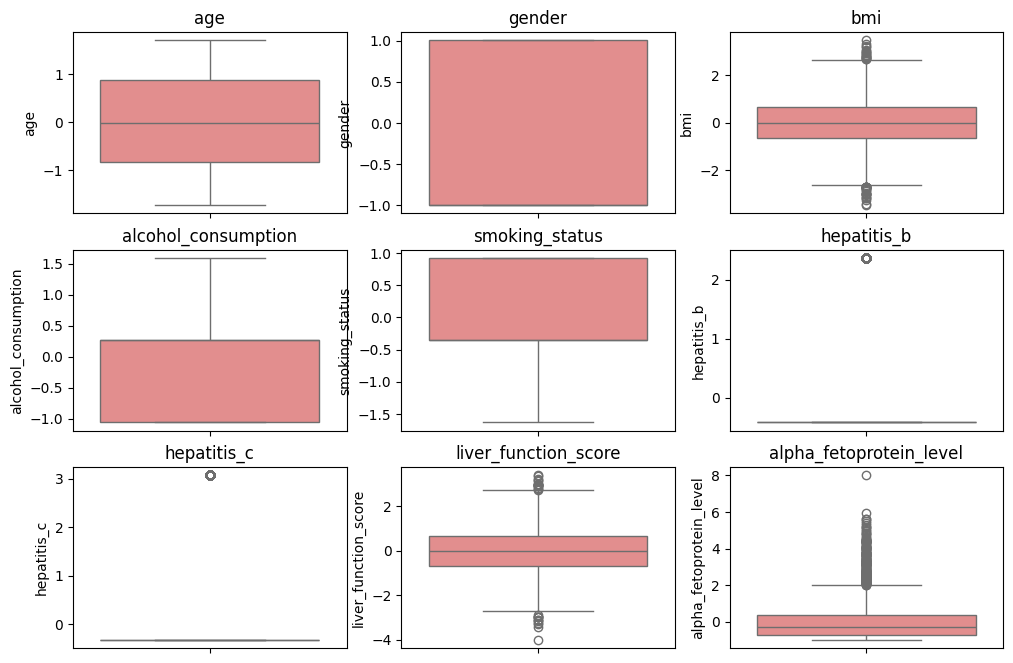

In [23]:
# STEP 10: Boxplots to check Outliers
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col], color="lightcoral")
    plt.title(col)
plt.tight_layout()
plt.show()


In [24]:
# STEP 11: Countplots for Categorical Features
cat_cols = df.select_dtypes(include=["int64"]).columns.difference(num_cols)  # encoded categories
plt.figure(figsize=(12,6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,3,i)
    sns.countplot(x=df[col], palette="Set2")
    plt.title(col)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

In [26]:
# STEP 12: Pie Chart Example (for one categorical feature)
if len(cat_cols) > 0:
    df[cat_cols[0]].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
    plt.title(f"Pie Chart of {cat_cols[0]}")
    plt.show()


**Random Forest Classifier for prediction**

In [31]:
# STEP 1: Import ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
# STEP 2: Define Features (X) and Target (y)
# Target column is 'liver_cancer'
X = df.drop("liver_cancer", axis=1)   # features
y = df["liver_cancer"]                # target

In [33]:
#  STEP 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4000, 13)
Testing set shape: (1000, 13)


In [40]:
#STEP 4: Fix target column (make sure it's categorical 0/1)
# If values are float like 0.0/1.0 -> convert to int
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # number of trees
    random_state=42,
    n_jobs=-1          # use all CPU cores
)

rf_model.fit(X_train, y_train)



RandomForestClassifier(n_jobs=-1, random_state=42)

✅ Accuracy: 0.943

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       782
           1       0.97      0.77      0.85       218

    accuracy                           0.94      1000
   macro avg       0.95      0.88      0.91      1000
weighted avg       0.94      0.94      0.94      1000



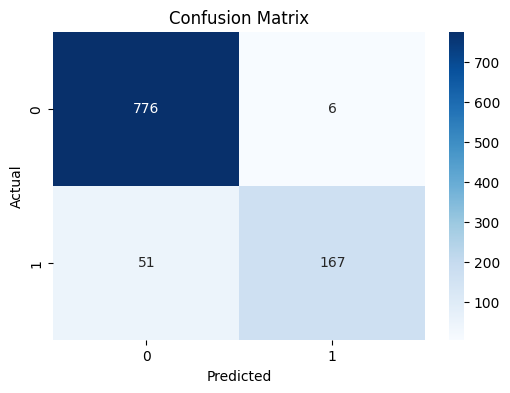

In [39]:
# STEP 5: Predictions
y_pred = rf_model.predict(X_test)

# STEP 6: Model Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




/tmp/ipython-input-2637470396.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


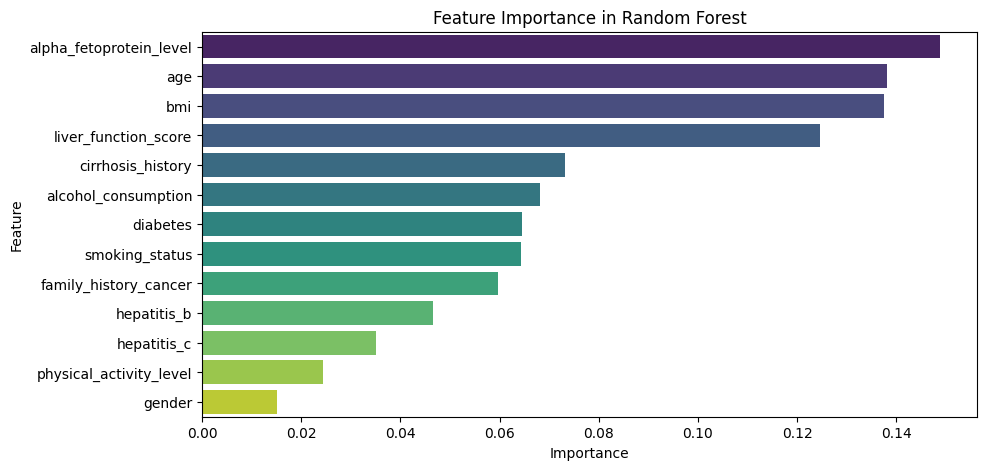

In [38]:
# STEP 7: Feature Importance
importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.show()